In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import pyBigWig
import numpy as np

In [284]:
ez=pd.read_csv('data/ez.csv',index_col=0,engine='c')
exp=pd.read_csv('data/exp.csv',index_col=0,engine='c')

In [13]:
h=pd.read_csv('data/h.csv',index_col=0,engine='c')

In [18]:
ez=ez.merge(h,left_index=True,right_index=True)

In [47]:
df=pd.read_csv('data/meth/fib.csv',index_col=0)
df.shape

(3150367, 5)

In [134]:
fs=[c.strip('.meth') for c in df.columns]

In [135]:
df.columns=fs

In [175]:
df['s']=df.sum(1)
df=df[df.s>0]
df=df[df.s<len(fs)]
df=df.drop('s',axis=1).round(3)
df.shape

(2039630, 5)

In [176]:
ind=pd.read_csv('data/ind.csv',index_col=0,engine='c')
#ind=ind.merge(ez,left_index=True, right_index=True)

In [198]:
ez=ez[ez.index.str.split('_').str[0]=='2']
cut=ez[(ez['ez']==1000)]
dg=df[df.index.isin(cut.index)].copy()
dg.shape

(12951, 5)

In [199]:
p=pd.DataFrame(dg.mean())
p['age']=[4,7,10,31,33]
p

,0,age
SRR3264413,0.220584,4
SRR3264414,0.225392,7
SRR3264415,0.240123,10
SRR3264416,0.314571,31
SRR3264722,0.321792,33


In [200]:
dg=dg.merge(ind.gene,left_index=True,right_index=True)

In [221]:
dgg=dg.groupby('gene').mean()

In [230]:
df=df.merge(ind.gene,left_index=True,right_index=True)

In [253]:
dff=df.groupby('gene').mean()

In [377]:
dff['d']=dff['SRR3264722']-dff['SRR3264413']
len(dff)

18001

<AxesSubplot:>

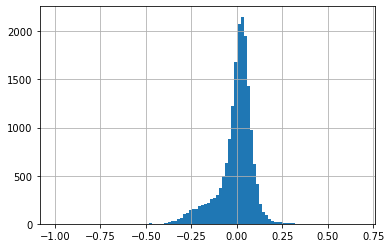

In [378]:
dff.d.hist(bins=100)

In [380]:
eg=ez[ez.ez==1000].merge(ind,left_index=True,right_index=True)
len(eg)

313491

In [351]:
len(dff)

18001

In [400]:
(dfe.d>0).sum()

58315

In [405]:
(dff[dff.index.isin(eg.gene)].d>0).sum()

1386

<AxesSubplot:>

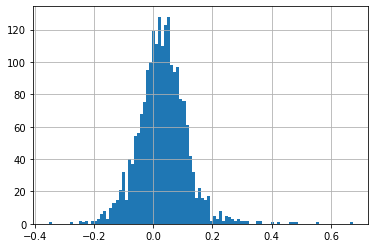

In [409]:
dff[dff.index.isin(eg.gene)].d.hist(bins=100)

<AxesSubplot:>

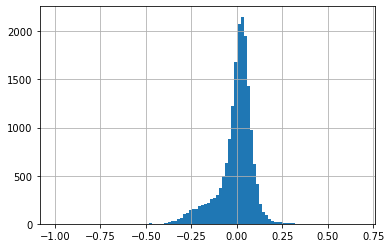

In [407]:
dff.d.hist(bins=100)

In [318]:
dfff=dff[dff.d>.5]
len(dfff)

51

In [319]:
len(dfff[dfff.index.isin(eg.gene)])

31

In [204]:
pl=dg.rolling(200).mean()

In [205]:
pl['d']=pl['SRR3264722']-pl['SRR3264413']
pl.sort_values('d').head(50)

,SRR3264413,SRR3264414,SRR3264415,SRR3264416,SRR3264722,d
2_19361206,0.429880,0.458855,0.526380,0.192675,0.160895,-0.268985
2_19361202,0.424880,0.457070,0.521380,0.188390,0.156350,-0.268530
2_19361210,0.433215,0.463300,0.530755,0.196245,0.165895,-0.267320
2_19360937,0.402965,0.436125,0.499490,0.172500,0.136455,-0.266510
2_19360989,0.406715,0.438625,0.503655,0.177500,0.141455,-0.265260
2_19361218,0.435715,0.467845,0.535755,0.201245,0.170895,-0.264820
2_19361161,0.419880,0.452625,0.516380,0.188570,0.155185,-0.264695
2_19361036,0.414880,0.448625,0.511380,0.186070,0.150185,-0.264695
2_19361001,0.409880,0.443625,0.507745,0.182500,0.145900,-0.263980
2_19360705,0.397965,0.431125,0.495115,0.170415,0.134235,-0.263730


<AxesSubplot:>

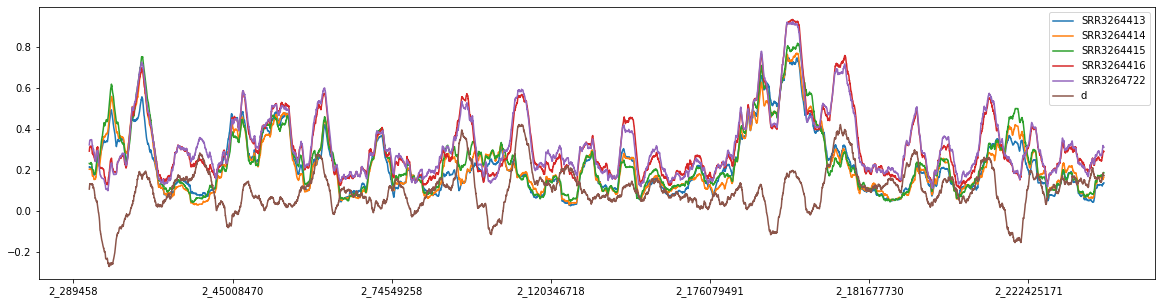

In [206]:
pl.plot(figsize=(20,5))

In [52]:
dg['dd']=dg[fs[-1]]-dg[fs[0]]

<AxesSubplot:>

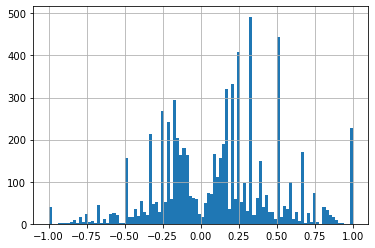

In [53]:
dg[dg.dd!=0].dd.hist(bins=100)

<AxesSubplot:xlabel='age', ylabel='0'>

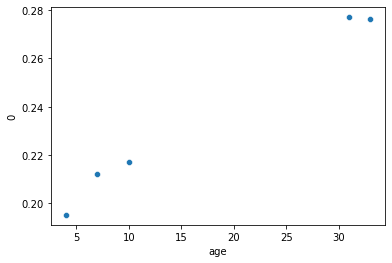

In [54]:
sns.scatterplot(data=p,x='age',y=0)

In [37]:
p.corr()

,0,age
0,1.000000,0.999528
age,0.999528,1.000000


In [5]:
ring='https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM327nnn/GSM327666/suppl/GSM327666_hES.RING1B.aligned.txt.gz'
ring=pd.read_csv(ring,sep='\t',header=None,engine='c')

In [11]:
ring[ring[5]>0][[0,1,2]].to_csv('data/ring18.bed',sep='\t',header=False,index=False)

In [13]:
ring=pd.read_csv('data/ring38.bed',sep='\t',header=None)

In [18]:
ring=ring[ring[0]=='chr1']

In [21]:
ring['r']=ring.apply(lambda x:set(range(x[1],x[2])),axis=1)

/local/scratch/moqri/slrmtmp.30775880/ipykernel_46695/2575654243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ring['r']=ring.apply(lambda x:set(range(x[1],x[2])),axis=1)


In [32]:
rs=ring.r.values

In [33]:
rs=set.union(*rs)

In [37]:
ez=ez[ez.index.str.split('_').str[0].astype(int)==1]

In [39]:
ez.loc[ez.index.str.split('_').str[1].astype(int).isin(rs),'prc1']=1

/home/moqri/miniconda3/envs/meth/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/moqri/miniconda3/envs/meth/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [44]:
ez=ez.fillna(0)

In [45]:
ez.value_counts('prc1')

prc1
0.0    348036
1.0      7134
dtype: int64

In [55]:
ez

,ez,prc1
_,,
1_60573,0,0.0
1_60725,0,0.0
1_61019,0,0.0
1_61134,0,0.0
1_61577,0,0.0
...,...,...
1_248910925,0,0.0
1_248910941,0,0.0
1_248911049,0,0.0
